In [14]:
import numpy as np
import pandas as pd
from netCDF4 import Dataset
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
%matplotlib notebook

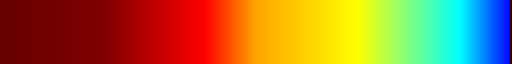

In [15]:
import matplotlib.colors as mcolors
to_rgb = mcolors.ColorConverter().to_rgb
# d = {
#     0.0: 'blue', 
#     0.2: 'cyan', 
#     0.4: 'yellow', 
#     0.5: 'orange', 
#     0.7: 'red', 
#     0.9: (0.5, 0, 0),
#     1.0: (0.4, 0, 0)
# }
d = {
    0.0: (0.4, 0, 0),
    0.2: (0.5, 0, 0),
    0.4: 'red',
    0.5: 'orange',
    0.7: 'yellow',
    0.9: 'cyan',
    1.0: "blue"
}

def create_cmap(points):
    red, green, blue = [], [], []
    for idx, color in points.items():
        r, g, b = to_rgb(color) if type(color)==str else color
        red.append([idx, r, r])
        green.append([idx, g, g])
        blue.append([idx, b, b])
    red.append([1,0.2,0])
    green.append([1,0,0])
    blue.append([1,0,0])
    
    return { 'red': red, 'green': green, 'blue': blue}

newcmp = LinearSegmentedColormap('testCmap', segmentdata=create_cmap(d), N=256)
newcmp

In [16]:
# Read dataset
dataset = Dataset(r'cmems_mod_glo_subset.nc')
dataset

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: CF-1.11
    title: daily mean fields from Global Ocean Physics Analysis and Forecast updated Daily
    institution: Mercator Ocean International
    producer: CMEMS - Global Monitoring and Forecasting Centre
    source: MOI GLO12
    credit: E.U. Copernicus Marine Service Information (CMEMS)
    contact: https://marine.copernicus.eu/contact
    references: http://marine.copernicus.eu
    subset:source: ARCO data downloaded from the Marine Data Store using the MyOcean Data Portal
    subset:productId: GLOBAL_ANALYSISFORECAST_PHY_001_024
    subset:datasetId: cmems_mod_glo_phy-so_anfc_0.083deg_P1D-m_202211
    subset:date: 2024-06-10T00:36:13.569Z
    dimensions(sizes): depth(24), latitude(49), longitude(48), time(1)
    variables(dimensions): float32 depth(depth), float32 latitude(latitude), float32 longitude(longitude), float32 so(time, depth, latitude, longitude), float64 time(time),

In [17]:
import os
os.getcwd()

'c:\\Users\\admin\\Downloads\\WAMSI\\netflet_derson-main\\netflet_derson-main\\data\\netcdf'

In [18]:
# Get time data
time = np.array(dataset.variables['time'])
time

array([1.7186688e+09])

In [19]:
# Get depth data
depth = np.array(dataset.variables['depth'][:])
depth

array([  0.494025,   1.541375,   2.645669,   3.819495,   5.078224,
         6.440614,   7.92956 ,   9.572997,  11.405   ,  13.46714 ,
        15.81007 ,  18.49556 ,  21.59882 ,  25.21141 ,  29.44473 ,
        34.43415 ,  40.34405 ,  47.37369 ,  55.76429 ,  65.80727 ,
        77.85385 ,  92.32607 , 109.7293  , 130.666   ], dtype=float32)

In [20]:
# Get latitide data
latitude = np.array(dataset.variables['latitude'])
latitude

array([-33.      , -32.916668, -32.833332, -32.75    , -32.666668,
       -32.583332, -32.5     , -32.416668, -32.333332, -32.25    ,
       -32.166668, -32.083332, -32.      , -31.916666, -31.833334,
       -31.75    , -31.666666, -31.583334, -31.5     , -31.416666,
       -31.333334, -31.25    , -31.166666, -31.083334, -31.      ,
       -30.916666, -30.833334, -30.75    , -30.666666, -30.583334,
       -30.5     , -30.416666, -30.333334, -30.25    , -30.166666,
       -30.083334, -30.      , -29.916666, -29.833334, -29.75    ,
       -29.666666, -29.583334, -29.5     , -29.416666, -29.333334,
       -29.25    , -29.166666, -29.083334, -29.      ], dtype=float32)

In [21]:
# Get longitude data
longitude = np.array(dataset.variables['longitude'])
longitude

array([112.000015, 112.08335 , 112.16668 , 112.250015, 112.33335 ,
       112.41668 , 112.500015, 112.58335 , 112.66669 , 112.750015,
       112.83335 , 112.91669 , 113.000015, 113.08335 , 113.16669 ,
       113.250015, 113.33335 , 113.41669 , 113.500015, 113.58335 ,
       113.66669 , 113.750015, 113.83335 , 113.91669 , 114.000015,
       114.08335 , 114.16669 , 114.250015, 114.33335 , 114.41669 ,
       114.500015, 114.58335 , 114.66669 , 114.750015, 114.83335 ,
       114.91669 , 115.000015, 115.08335 , 115.16669 , 115.250015,
       115.33335 , 115.41669 , 115.500015, 115.58335 , 115.66669 ,
       115.750015, 115.83335 , 115.91669 ], dtype=float32)

## Temperatura

In [22]:
# Get temperature data from specific time and depth
temp_data = dataset.variables['thetao'][:]
temp = temp_data[0][0]
temp

masked_array(
  data=[[19.75950050354004, 19.860671997070312, 19.9680118560791, ...,
         --, --, --],
        [19.851802825927734, 19.951519012451172, 20.03087043762207, ...,
         --, --, --],
        [19.85968589782715, 19.971635818481445, 20.049964904785156, ...,
         --, --, --],
        ...,
        [22.857707977294922, 22.76749610900879, 22.684236526489258, ...,
         --, --, --],
        [22.925594329833984, 22.803186416625977, 22.704795837402344, ...,
         --, --, --],
        [22.83802604675293, 22.731523513793945, 22.64960289001465, ...,
         --, --, --]],
  mask=[[False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        ...,
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True]],
  fill_value=nan,
  dtype=float32)

In [23]:
# Temperatura
df = pd.DataFrame(temp, index=latitude, columns=longitude)
df = df.sort_index(ascending=False)

txt = 'var temperature = ['
for row, row_data in df.iterrows():
    for col, data in row_data.items():
        if (not pd.isnull(data)):
            txt += '[%f, %f, %f],\n' % (row, col, data)
txt += ']'

with open('temperature.js', 'w') as f:
    f.write(txt)

plt.title('Temperature')
sns.heatmap(df, cmap=newcmp)

<IPython.core.display.Javascript object>

<Axes: title={'center': 'Temperature'}>

## Salinidade

In [24]:
# Get temperature data from specific time and depth
sal_data = dataset.variables['so'][:]
sal = sal_data[0][0]
sal

masked_array(
  data=[[35.824092864990234, 35.82660675048828, 35.825836181640625, ...,
         --, --, --],
        [35.818294525146484, 35.82046127319336, 35.81985092163086, ...,
         --, --, --],
        [35.812198638916016, 35.81370544433594, 35.81324768066406, ...,
         --, --, --],
        ...,
        [35.459842681884766, 35.44760513305664, 35.44999694824219, ...,
         --, --, --],
        [35.438785552978516, 35.41944122314453, 35.41279602050781, ...,
         --, --, --],
        [35.39780807495117, 35.37596893310547, 35.37137985229492, ...,
         --, --, --]],
  mask=[[False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        ...,
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True]],
  fill_value=nan,
  dtype=float32)

In [25]:
# Salinidade
df = pd.DataFrame(sal, index=latitude, columns=longitude)
df = df.sort_index(ascending=False)

txt = 'var salinity = ['
for row, row_data in df.iterrows():
    for col, data in row_data.items():
        if (not pd.isnull(data)):
            txt += '[%f, %f, %f],\n' % (row, col, data)
txt += ']'

with open('salinity.js', 'w') as f:
    f.write(txt)

plt.title('Salinity')
sns.heatmap(df, cmap=newcmp)

<IPython.core.display.Javascript object>

<Axes: title={'center': 'Salinity'}>

## Wind

In [26]:
# Get u
u_data = dataset.variables['uo'][:]
u = u_data[0][0]
u

masked_array(
  data=[[0.088425412774086, 0.10145177692174911, 0.10978618264198303,
         ..., --, --, --],
        [0.08266083896160126, 0.08781488239765167, 0.09303732216358185,
         ..., --, --, --],
        [0.047781262546777725, 0.04864370822906494, 0.047349728643894196,
         ..., --, --, --],
        ...,
        [0.44801974296569824, 0.4419192671775818, 0.43229982256889343,
         ..., --, --, --],
        [0.44319358468055725, 0.43202245235443115, 0.4226376414299011,
         ..., --, --, --],
        [0.41631072759628296, 0.4081996977329254, 0.40097561478614807,
         ..., --, --, --]],
  mask=[[False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        ...,
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True]],
  fill_value=nan,
  dtype

In [27]:
# U
dfu = pd.DataFrame(u, index=latitude, columns=longitude)
dfu = dfu.sort_index(ascending=False)
# dfu = dfv.fillna(-99)
dfu

,112.000015,112.083351,112.166679,112.250015,112.333351,112.416679,112.500015,112.583351,112.666687,112.750015,...,115.166687,115.250015,115.333351,115.416687,115.500015,115.583351,115.666687,115.750015,115.833351,115.916687
-29.000000,0.416311,0.408200,0.400976,0.390895,0.378355,0.358648,0.333566,0.303475,0.267854,0.235997,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-29.083334,0.443194,0.432022,0.422638,0.409722,0.394565,0.373567,0.348332,0.321467,0.288673,0.255380,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-29.166666,0.448020,0.441919,0.432300,0.416313,0.398644,0.377547,0.353642,0.331583,0.305045,0.274020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-29.250000,0.454198,0.447483,0.435423,0.420908,0.408768,0.393243,0.371667,0.350518,0.326405,0.297745,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-29.333334,0.467233,0.455376,0.449185,0.450813,0.455047,0.450139,0.429957,0.400775,0.369077,0.336015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-29.416666,0.486067,0.490032,0.508100,0.531805,0.549078,0.546933,0.521973,0.482723,0.439111,0.393885,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-29.500000,0.542030,0.582040,0.618864,0.634378,0.636618,0.622044,0.587640,0.543051,0.496363,0.448247,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-29.583334,0.649741,0.689698,0.679040,0.627175,0.589979,0.572547,0.547575,0.514341,0.481202,0.449069,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-29.666666,0.710858,0.651087,0.485420,0.323130,0.274159,0.309887,0.348272,0.363256,0.371573,0.382266,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-29.750000,0.485993,0.220633,-0.108382,-0.183469,-0.071779,0.042987,0.160323,0.243526,0.297394,0.336650,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# Get v
v_data = dataset.variables['vo'][:]
v = v_data[0][0]
v

masked_array(
  data=[[0.04618581384420395, 0.018423521891236305,
         0.0005094604566693306, ..., --, --, --],
        [0.051989372819662094, 0.025377051904797554,
         -0.00039668052340857685, ..., --, --, --],
        [0.04581856727600098, 0.026007002219557762, 0.002332101808860898,
         ..., --, --, --],
        ...,
        [0.29677248001098633, 0.2987876832485199, 0.2865145802497864,
         ..., --, --, --],
        [0.3041866421699524, 0.30340704321861267, 0.29502272605895996,
         ..., --, --, --],
        [0.318864643573761, 0.31100961565971375, 0.30114883184432983,
         ..., --, --, --]],
  mask=[[False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        ...,
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True]],
  fill_value=nan

In [29]:
# V
dfv = pd.DataFrame(v, index=latitude, columns=longitude)
dfv = dfv.sort_index(ascending=False)
# dfv = dfv.fillna(-99)
dfv

,112.000015,112.083351,112.166679,112.250015,112.333351,112.416679,112.500015,112.583351,112.666687,112.750015,...,115.166687,115.250015,115.333351,115.416687,115.500015,115.583351,115.666687,115.750015,115.833351,115.916687
-29.000000,0.318865,0.311010,0.301149,0.285131,0.265253,0.238464,0.210280,0.187437,0.164922,0.163280,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-29.083334,0.304187,0.303407,0.295023,0.273544,0.243082,0.205952,0.167651,0.139475,0.116269,0.105538,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-29.166666,0.296772,0.298788,0.286515,0.258900,0.220720,0.177623,0.132697,0.098461,0.074189,0.055216,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-29.250000,0.303609,0.297533,0.277158,0.241786,0.199059,0.155677,0.106837,0.065610,0.038939,0.014516,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-29.333334,0.306690,0.292055,0.268387,0.232405,0.189430,0.143955,0.092505,0.041892,0.007168,-0.019832,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-29.416666,0.308737,0.301327,0.283122,0.252068,0.207273,0.146255,0.076144,0.009122,-0.038145,-0.063109,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-29.500000,0.337200,0.363890,0.359578,0.308329,0.233731,0.144833,0.045675,-0.044430,-0.103466,-0.128116,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-29.583334,0.405889,0.449284,0.411838,0.306827,0.212078,0.109971,0.001626,-0.095590,-0.159441,-0.184668,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-29.666666,0.438315,0.407748,0.266018,0.192557,0.211030,0.121413,-0.023755,-0.129854,-0.184885,-0.203984,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-29.750000,0.303380,0.152939,0.088373,0.218283,0.311818,0.250457,0.110953,-0.064597,-0.169496,-0.199687,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
x = df.columns.values
y = df.index.values

fig, ax = plt.subplots()
q = ax.quiver(x, y, dfu.values, dfv.values)
ax.quiverkey(q, X=0.3, Y=1.1, U=0.5,
             label='Quiver key, length = 0.5', labelpos='E')

<IPython.core.display.Javascript object>

In [32]:
import json
# Criar arquivo de saida
nx = len(x)
ny = len(y)
dx = float(np.diff(longitude).mean())
dy = float(np.diff(latitude).mean())
tot = nx*ny
la1,la2 = float(max(latitude)), float(min(latitude))
lo1,lo2 = float(min(longitude)), float(max(longitude))
udata = np.nan_to_num(dfu.values.flatten()*10).astype(float)
vdata = np.nan_to_num(dfv.values.flatten()*10).astype(float)

wind_data = [{
  "header": {
    "parameterNumberName": "eastward_wind",
    "parameterUnit": "m.s-1",
    "parameterNumber": 2,
    "parameterCategory": 2,
    "nx": nx,
    "ny": ny,
    "numberPoints": tot,
    "dx": dx,
    "dy": dy,
    "la1": la1,
    "lo1": lo1,
    "la2": la2,
    "lo2": lo2,
#     "refTime": "2017-02-01 23:00:00"
  },
  "data": list(udata)
}, {
  "header": {
    "parameterNumberName": "northward_wind",
    "parameterUnit": "m.s-1",
    "parameterNumber": 3,
    "parameterCategory": 2,
    "nx": nx,
    "ny": ny,
    "numberPoints": tot,
    "dx": dx,
    "dy": dy,
    "la1": la1,
    "lo1": lo1,
    "la2": la2,
    "lo2": lo2,
#     "refTime": "2017-02-01 23:00:00"
  },
  "data": list(vdata)
}]

with open('wind.json', 'w') as outfile:
    json.dump(wind_data, outfile, separators=(',', ':'), indent=4)